<a href="https://colab.research.google.com/github/DelsonMartins/Machine-Learning/blob/main/transfer_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os

In [2]:
# Load the Dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
data_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Preprocessing the data
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.


In [4]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(160, 160),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [5]:
# Load the pre-trained model
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                                      include_top=False,
                                                      weights='imagenet')

# Freeze the layers of the base model
pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Create the final model
model = models.Sequential([
    pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(2, activation='softmax')  # For two classes: cats and dogs
])

In [7]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 63s 771ms/step - accuracy: 0.5817 - loss: 0.7905 - val_accuracy: 0.6183 - val_loss: 0.7107
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 95s 949ms/step - accuracy: 0.5941 - loss: 0.7181 - val_accuracy: 0.6250 - val_loss: 0.6787
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 68s 754ms/step - accuracy: 0.6239 - loss: 0.6834 - val_accuracy: 0.6150 - val_loss: 0.6692
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 766ms/step - accuracy: 0.6236 - loss: 0.6743 - val_accuracy: 0.6450 - val_loss: 0.6668
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 767ms/step - accuracy: 0.6425 - loss: 0.6695 - val_accuracy: 0.6233 - val_loss: 0.6636
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 746ms/step - accuracy: 0.6343 - loss: 0.6729 - val_accuracy: 0.6333 - val_loss: 0.6620
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 766ms/step - accuracy: 0.6476 - loss: 0.6600 - val_accuracy: 0.6133 - val_loss: 0.6639
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 90s 873ms/step - accuracy: 0.6364 - loss: 0.6591 - val_accu

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.6212 - loss: 0.6889
Accuracy: 64.00%


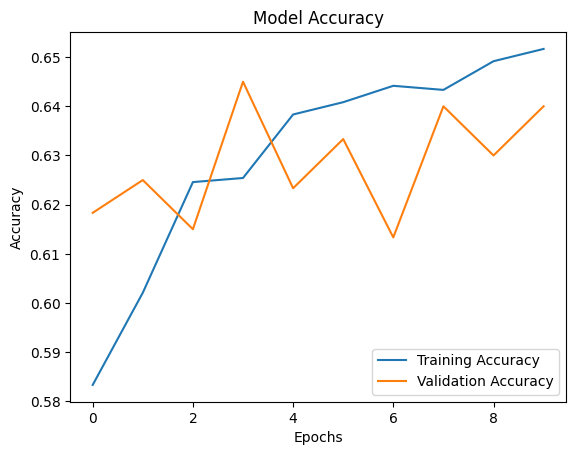

In [10]:
# Visualize the results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Test with real images
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = 'Dog' if predictions[0][1] > predictions[0][0] else 'Cat'

    print(f"The image is a: {predicted_class}")